In [46]:
import folium
import numpy as np
from IPython.display import display,IFrame
import matplotlib.pyplot as plt

In [6]:
mis_coordenadas = (19.323644794070223, -99.17898375489459)
mapa = folium.Map(location=mis_coordenadas,zoom_star=15)
folium.Marker(mis_coordenadas,popup='Aquì estoy').add_to(mapa)
mapa.save('salon.html')

In [40]:
mis_datos=np.genfromtxt('Trayecto_coche.csv',delimiter=',',dtype=float)
t=mis_datos[1:,0] #Tiempo
lat_long=mis_datos[1:,1:3]

mi_mapa=folium.Map(location=lat_long[0],zoom_star=15)
trayectoria = folium.PolyLine(locations=lat_long, color='#5DA689',weight=5)
trayectoria.add_to(mi_mapa)
folium.Marker(location=lat_long[0],popup='start',icon=folium.Icon(color='blue')).add_to(mi_mapa)
folium.Marker(location=lat_long[-1],popup='end',icon=folium.Icon(color='red')).add_to(mi_mapa)
mi_mapa.save('Karlitacoche.html')

display(mi_mapa) #Asociada a la biblioteca 1,3

In [45]:
is_datos=np.genfromtxt('Trayecto_coche.csv',delimiter=',',dtype=float)
t=mis_datos[1:,0] #Tiempo
lat_long=mis_datos[1:,1:3]

mi_mapa=folium.Map(location=lat_long[0],zoom_star=15)
trayectoria = folium.PolyLine(locations=lat_long, color='#5DA689',weight=5)
trayectoria.add_to(mi_mapa)
folium.Marker(location=lat_long[0],popup='start',icon=folium.Icon(color='blue')).add_to(mi_mapa)
folium.Marker(location=lat_long[-1],popup='end',icon=folium.Icon(color='red')).add_to(mi_mapa)
mi_mapa.save('Karlitacoche.html')

IFrame(src='Karlitacoche.html',width=350,height=350) #Asociada a la biblioteca 1,3

Tiempo= 25.31612255 Distancia= 9.568899491388821


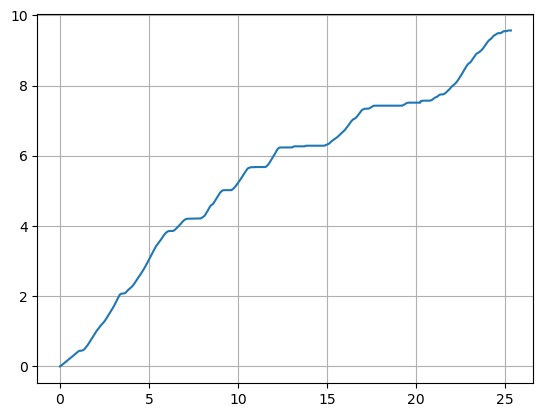

In [51]:
RT = 6371e3 #Radio de la Tierra, min 1:55 hr
lat = np.deg2rad(lat_long[:,0])
longitud = np.deg2rad(lat_long[:,1])
altura = mis_datos[1:,3]

x = (RT+altura)*np.cos(lat)*np.sin(longitud)
y = (RT+altura)*np.cos(lat)*np.cos(longitud)
z = (RT+altura)*np.sin(lat)

distancia = np.zeros_like(t)
for i in range(len(t)-1):
    distancia[i+1]= distancia[i] + np.sqrt((x[i+1]-x[i])**2 + (y[i+1]-y[i])**2 + (z[i+1]-z[i])**2)

plt.plot(t/60,distancia/1000)
print('Tiempo=',t[-1]/60,'Distancia=',distancia[-1]/1000)
plt.grid()
plt.show()